> ## **Evaluation Project 8 Flight Price Prediction**

By: Yashshree Baviskar



## Problem Statement:

**Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.**

Size of training set: 10683 records

Size of test set: 2671 records

#### **FEATURES:**

- Airline: The name of the airline.

- Date_of_Journey: The date of the journey

- Source: The source from which the service begins.

- Destination: The destination where the service ends.

- Route: The route taken by the flight to reach the destination.

- Dep_Time: The time when the journey starts from the source.

- Arrival_Time: Time of arrival at the destination.

- Duration: Total duration of the flight.

- Total_Stops: Total stops between the source and destination.

- Additional_Info: Additional information about the flight

- Price: The price of the ticket

 
**You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket.**

Note: You can find the dataset in the link below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects

In [3]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing Flight Prediction dataset Excel file using pandas
df = pd.read_excel('Data_Train.xlsx',parse_dates=['Date_of_Journey'])

In [5]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 10683
No of Columns: 11


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{datetime64[ns]: ['Date_of_Journey'], int64: ['Price'], object: ['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']}

In [7]:
# Converting Dep_Time and Arrival_Time to datetime format
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

#### Feature Extraction : We will create few new features for model building

**1. Feature Engineering on 'Dep_Time' Column**

In [8]:
# Extracting Hours from Dep_Time column
df['Dep_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour

# Extracting Minutes from Dep_Time column
df['Dep_Min']=pd.to_datetime(df['Dep_Time']).dt.minute

# Dropping Dep_Time column
df.drop("Dep_Time",axis=1,inplace=True)

**2. Feature Engineering on 'Arrival_Time' Column**

In [9]:
# Extracting Arrival_Hour from Arrival_Time column
df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour

# Extracting Arrival_Min from Arrival_Time column
df['Arrival_Min']=pd.to_datetime(df['Arrival_Time']).dt.minute

# Dropping Arruval_Time column
df.drop("Arrival_Time",axis=1,inplace=True)

**3. Feature Engineering on Date of Journey Column**

- **We are gone extract day, month and year column from feature Date of Journey**


In [10]:
# Extracting Day from Date_of_journey column
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_journey column
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

# Extracting Year from Date_of_journey column
df['Journey_Year'] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.year

- **Extracting weekday name.**

In [11]:
# Extracting WeekDay from Date_of_journey column
df['Week_Day'] = pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day_name()

# Dropping Date_of_journey column
df.drop("Date_of_Journey",axis=1,inplace=True)

**4. Feature Engineering on 'Duration' Column to extract flight duration in Minute**

In [12]:
# Conversion of Duration column from hr & Minutes format to Minutes
df['Duration']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

# convert this column into a numeric datatypes
df['Duration']=pd.to_numeric(df['Duration'])

## Data Integrity Check

#### 1. Duplicate data

- **Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.**

In [13]:
df.duplicated().sum()  # This will check the duplicate data for all columns.

222

**Around 222 duplicate data rows. There is no point on training model on duplicated data, so we gone drop them.**

In [14]:
df.drop_duplicates(keep='last',inplace= True)

In [15]:
df.shape

(10461, 16)

- **Let check if any whitespace, 'NA' or '-' exist in dataset.**

In [16]:
df.isin([' ','NA','-','?']).sum().any()

False

#### 2. Missing Value check

In [17]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                 Missing Values  % Missing data
Route                         1        0.009559
Total_Stops                   1        0.009559
Airline                       0        0.000000
Source                        0        0.000000
Destination                   0        0.000000
Duration                      0        0.000000
Additional_Info               0        0.000000
Price                         0        0.000000
Dep_Hour                      0        0.000000
Dep_Min                       0        0.000000
Arrival_Hour                  0        0.000000
Arrival_Min                   0        0.000000
Journey_Day                   0        0.000000
Journey_Month                 0        0.000000
Journey_Year                  0        0.000000
Week_Day                      0        0.000000


**Missing values are present in Total Stops and Route. These variable are categorical in nature, we gone impute them with mode.**

In [18]:
# Checking the mode of Categorical columns "Route" 
print("The mode of Route is:",df["Route"].mode())

# Filling the missing values in "Route" withs its mode
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])

# Checking the mode of Categorical columns "Total_Stops"
print("The mode of Total_Stops is:",df["Total_Stops"].mode())

# Filling the mising values in "Total_Stops" by its mode
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

The mode of Route is: 0    DEL → BOM → COK
dtype: object
The mode of Total_Stops is: 0    1 stop
dtype: object


In [19]:
# Missing Value after imputation
df.isnull().sum().any()

False

#### 3. Data Error Check

In [20]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Duration', 'Price', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Journey_Day', 'Journey_Month', 'Journey_Year'], object: ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info', 'Week_Day']}

In [21]:
Numerical_Features = ['Duration', 'Price', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Journey_Day', 'Journey_Month' ]
Categorical_Features = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info', 'Week_Day']

In [22]:
for i in Categorical_Features:
    print('Unique value counts of ',i, 'Enlisted as Below Table :')
    print('='*100)
    print(df[i].value_counts())
    print("-*--*-"*15)

Unique value counts of  Airline Enlisted as Below Table :
Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Unique value counts of  Source Enlisted as Below Table :
Delhi       4346
Kolkata     2860
Banglore    2177
Mumbai       697
Chennai      381
Name: Source, dtype: int64
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Unique value counts of  Destination Enlisted as Below Table

#### Observation:
- "New Delhi" is mention as "Delhi". We we gone regulated it.
- No info is mention as 'No Info' few times.
- **Very Few Premium economy or Business class flight in dataset. This might be due to high ticket price**

In [23]:
# Replacing "New Delhi" as "Delhi" in Destination column
df["Destination"] = df["Destination"].replace("New Delhi","Delhi")

# In the column "Additional Info", "No Info" and "No info" are same so replacing it by "No Info
df['Additional_Info'] = df['Additional_Info'].replace("No info", "No Info")

#### Comment :
***Finally, No Missing Value, data error and duplicate entry is Present.***

***We are Now Yes To Go Further !!!***

### Statistical Matrix

In [24]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Duration,10461.000000,629.945034,500.742197,5.000000,170.000000,505.000000,910.000000,2860.000000
Price,10461.000000,9027.212504,4624.861032,1759.000000,5224.000000,8266.000000,12346.000000,79512.000000
Dep_Hour,10461.000000,12.476341,5.726072,0.000000,8.000000,11.000000,18.000000,23.000000
Dep_Min,10461.000000,24.408278,18.817167,0.000000,5.000000,25.000000,40.000000,55.000000
Arrival_Hour,10461.000000,13.389638,6.853854,0.000000,8.000000,14.000000,19.000000,23.000000
Arrival_Min,10461.000000,24.723258,16.569495,0.000000,10.000000,25.000000,35.000000,55.000000
Journey_Day,10461.000000,12.629194,8.791165,3.000000,5.000000,6.000000,21.000000,27.000000
Journey_Month,10461.000000,5.535130,2.995285,1.000000,3.000000,5.000000,6.000000,12.000000
Journey_Year,10461.000000,2019.000000,0.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000


In [23]:
df[Categorical_Features].describe().T.style.background_gradient(cmap='summer_r')

,count,unique,top,freq
Airline,10461,12,Jet Airways,3700
Source,10461,5,Delhi,4346
Destination,10461,5,Cochin,4346
Route,10461,128,DEL → BOM → COK,2377
Total_Stops,10461,5,1 stop,5626
Additional_Info,10461,9,No Info,8184
Week_Day,10461,7,Thursday,2231


In [24]:
# Dropping Journey_Year column as it contain single column
df.drop("Journey_Year",axis=1,inplace=True)

#### Observation :
- The Minimum flight ticket price is Rs.1759 and Maximum flight ticket price is Rs.79512.**Outliers are present.**
- The ( mean > median ) for Price,Journey_Day,Duration and Dep_Hour, <u>**which mean right skew data.**</u>
- The ( mean < median ) for Dep_Min,Arrival_Hour and Arrival_Min <u>**which mean left skew data**.</u>
- **Presense of outliers in Duration & Price columns as we see huge difference in 75% and max.**
- High value of std. deviation indicating spread of data.
- There are 12 airline in dataset with **maximum flight run by Jet Airways.**
- The data of 128 route in dataset and we find **maximum flight on route DEL → BOM → COK.**

## Now We will try to explore the data to get more insights of data

- we will try to explore our target variable

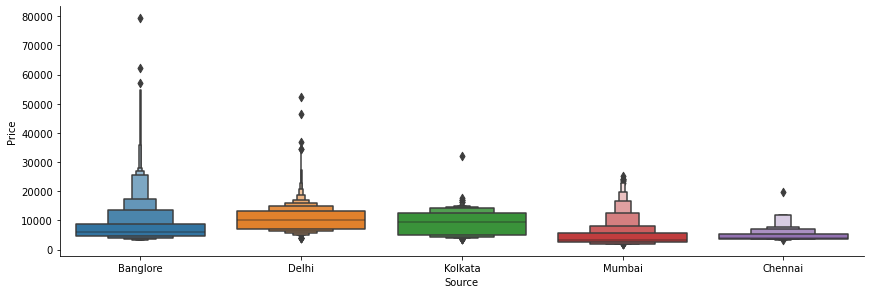

In [26]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

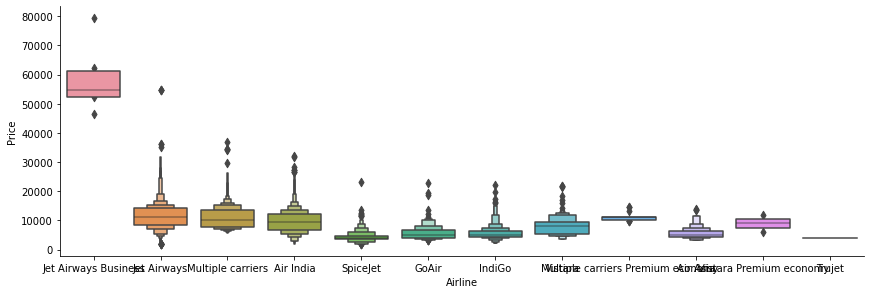

In [28]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

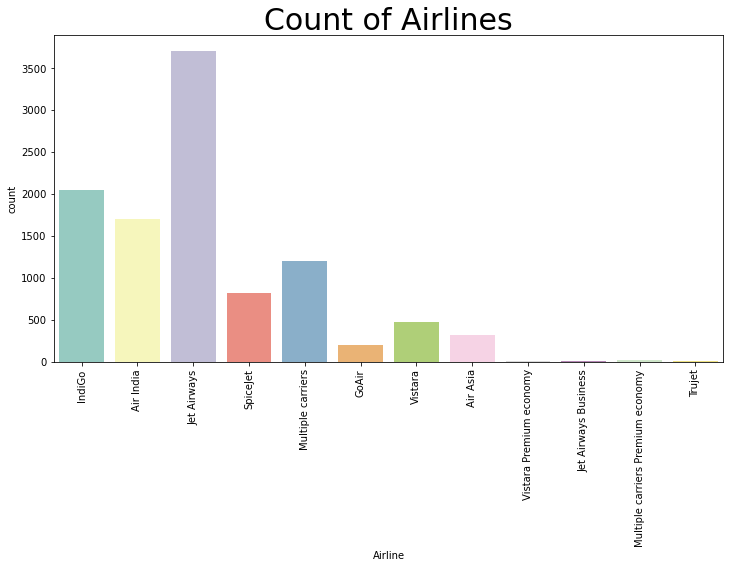

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(df['Airline'], palette='Set3')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

- Jet Airways has maximum conut which means most of the passengers prefered Jet Airways for there travelling in the year 2019.
- Trujet and GoAir has very less count which means only few poeple opted this airlines for there travelling in 2019.

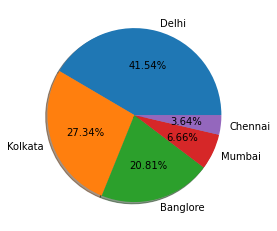

In [31]:
#Ploting pie chart for Source column
labels='Delhi','Kolkata','Banglore','Mumbai','Chennai'
fig, ax = plt.subplots()
ax.pie(df['Source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Here almost 42% airlines take delhi as source.

In [32]:
#Checking the value counts of Destination column
df.Destination.value_counts()

Cochin       4346
Banglore     2860
Delhi        2177
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

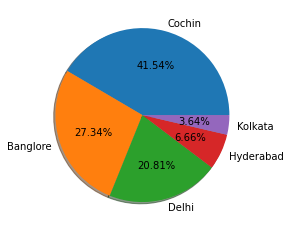

In [33]:
#Ploting pie chart for Destination column
labels='Cochin','Banglore','Delhi','Hyderabad','Kolkata'
fig, ax = plt.subplots()
ax.pie(df['Destination'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

- For maximum airlines Cochin is the destination.And for few airlines kolkata is the destination.

DEL → BOM → COK                2377
BLR → DEL                      1534
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → BOM → IXC → DEL             1
BLR → HBX → BOM → NAG → DEL       1
BOM → COK → MAA → HYD             1
BLR → HBX → BOM → BHO → DEL       1
BOM → JDH → JAI → DEL → HYD       1
Name: Route, Length: 128, dtype: int64


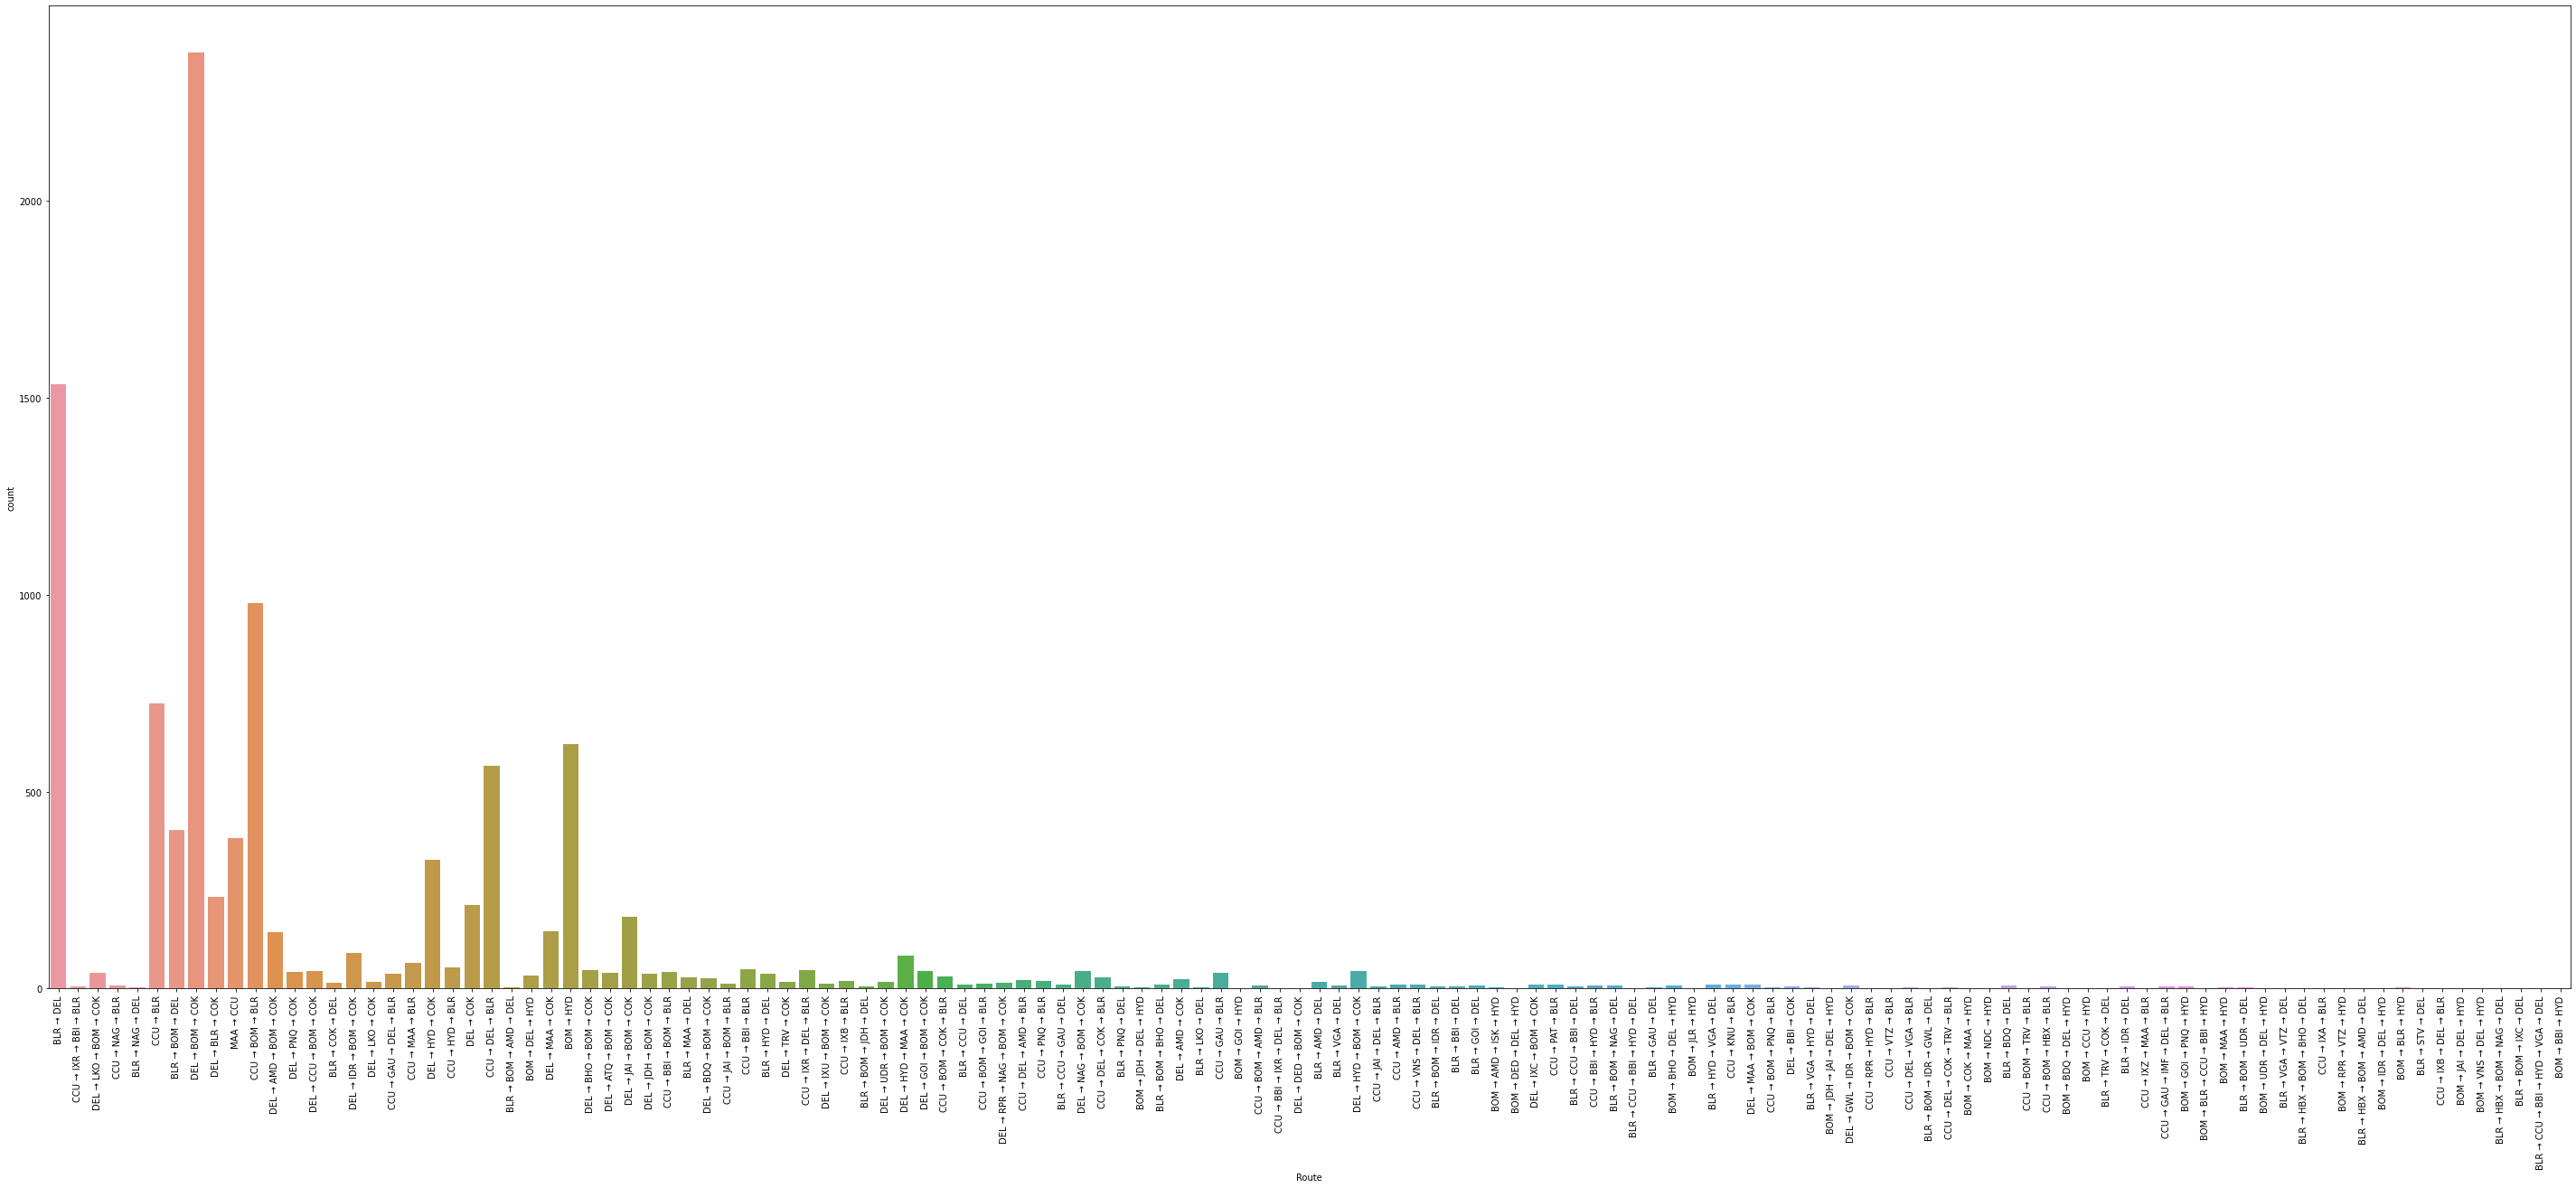

In [35]:
print(df.Route.value_counts())
#Count plot for Route column
plt.figure(figsize=[50,20])
sns.countplot(df['Route'])
plt.xticks(rotation=90);

## Let's seperate the categorical and Numerical data

In [37]:
# checking for categorical features
categorical=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical.append(i)
print(categorical)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info', 'Week_Day']


In [38]:
# Now checking for numerical columns
numerical=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical.append(i)
print(numerical)

['Duration', 'Price', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Journey_Day', 'Journey_Month', 'Journey_Year']


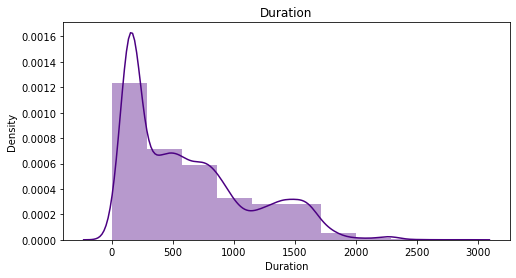

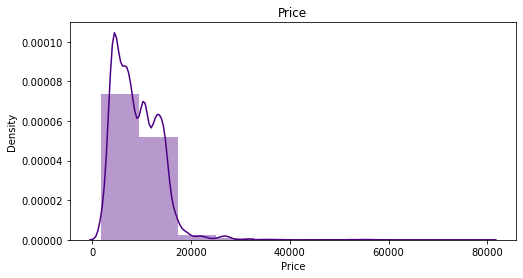

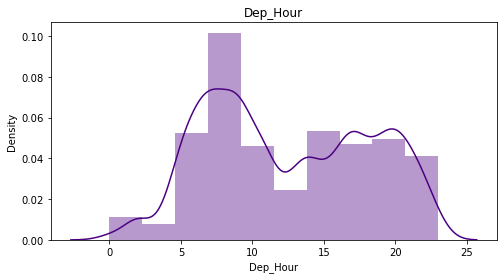

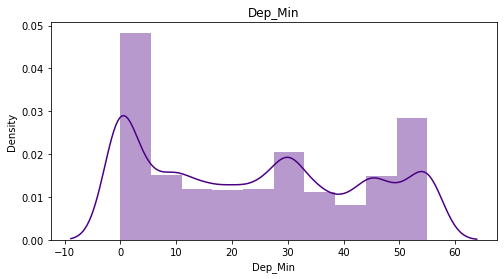

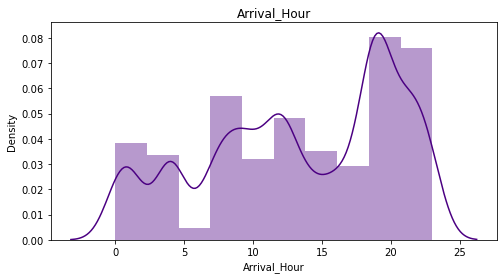

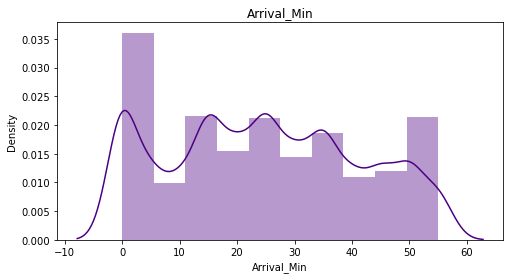

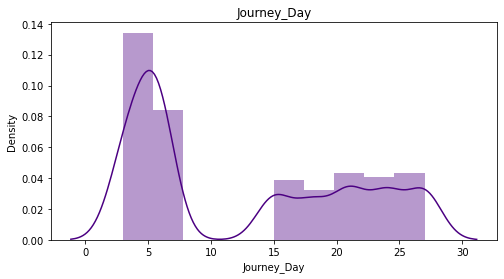

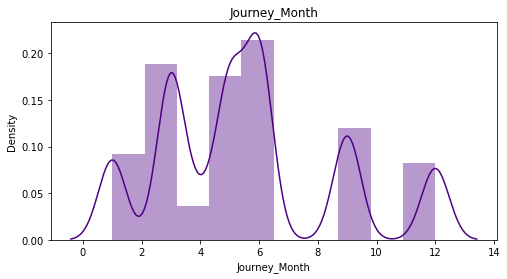

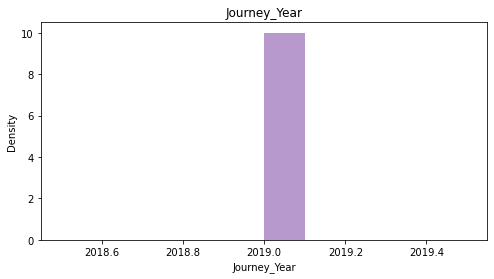

In [39]:
#Distribution plot for all numerical features
for i in df[numerical]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="indigo")
    plt.title(i)
    plt.show()

__Here skewness present in some features in further data investigation we will remove it.__

<AxesSubplot:xlabel='Destination', ylabel='Price'>

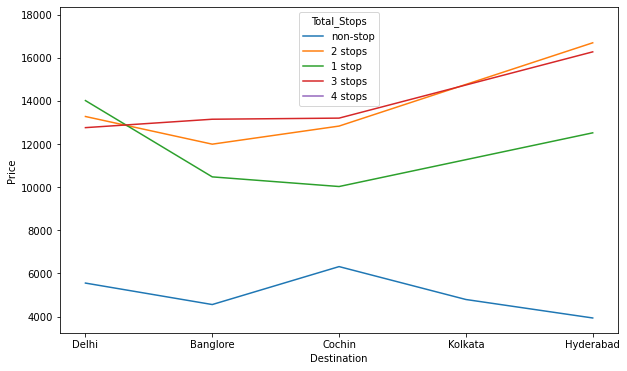

In [40]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Destination', y='Price', hue='Total_Stops', data=df, ci=None)

**As we get insights from the above lineplot that very lowest prices available for non stop flights and having highest prices which having more than 2 stops in journey.**

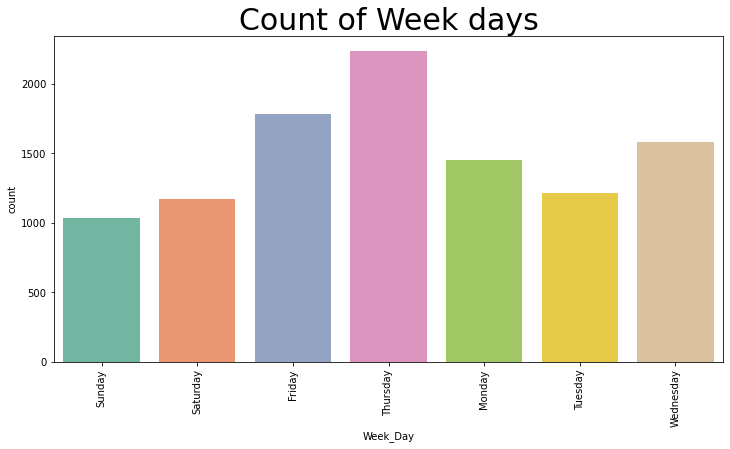

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(df['Week_Day'], palette='Set2')
plt.title('Count of Week days', size=30)
plt.xticks(rotation=90)
plt.show()

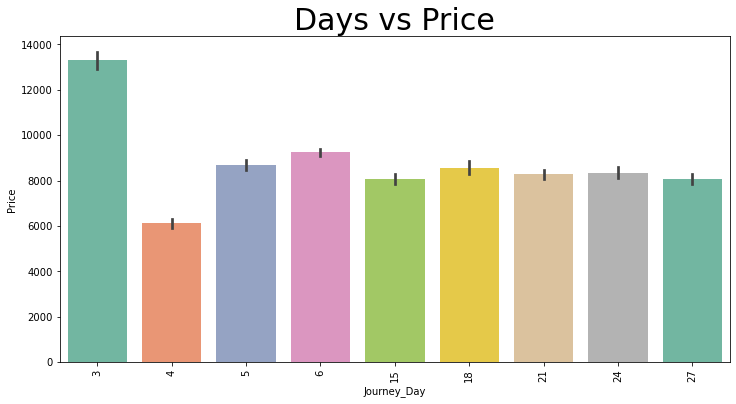

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(df['Journey_Day'], df['Price'], palette='Set2')
plt.title('Days vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

In 3rd day of each month the price is high which means it may be max weekends.And in 4th the price is low,except these two all other days the price is constant.

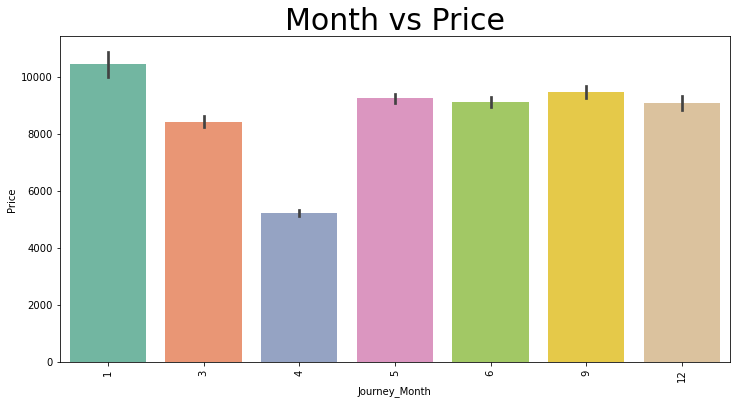

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(df['Journey_Month'], df['Price'], palette='Set2')
plt.title('Month vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

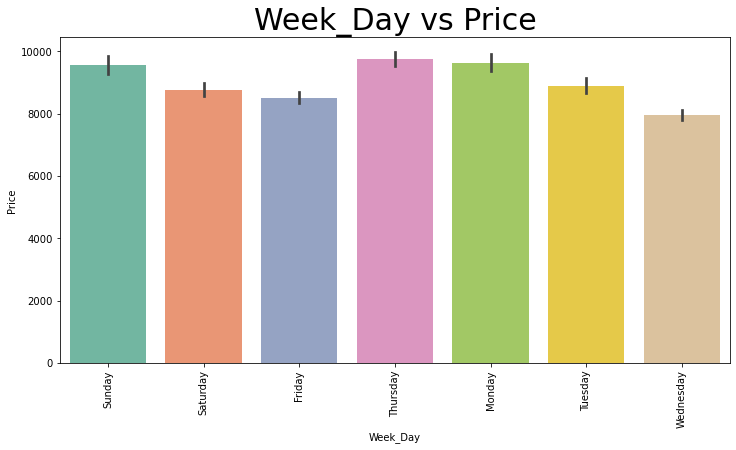

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(df['Week_Day'], df['Price'], palette='Set2')
plt.title('Week_Day vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

**Highest flight prices on Thursday,monday and followed by sunday, tuesday, and comparatively lowest rate availble on wednesday**

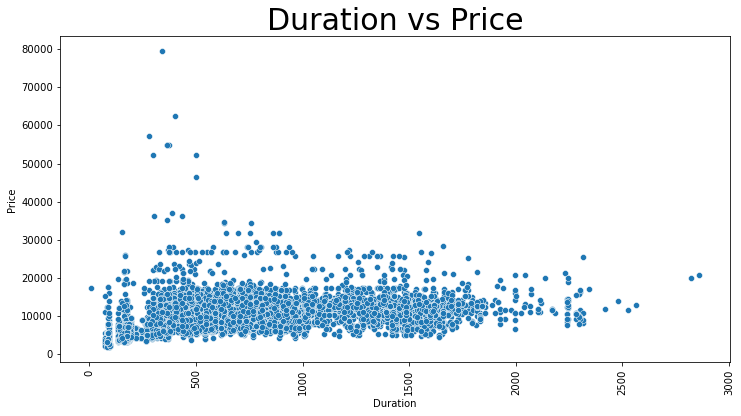

In [48]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['Duration'], df['Price'], palette='Set2')
plt.title('Duration vs Price', size=30)
plt.xticks(rotation=90)
plt.show()


For all the Durations the price range is almost same.

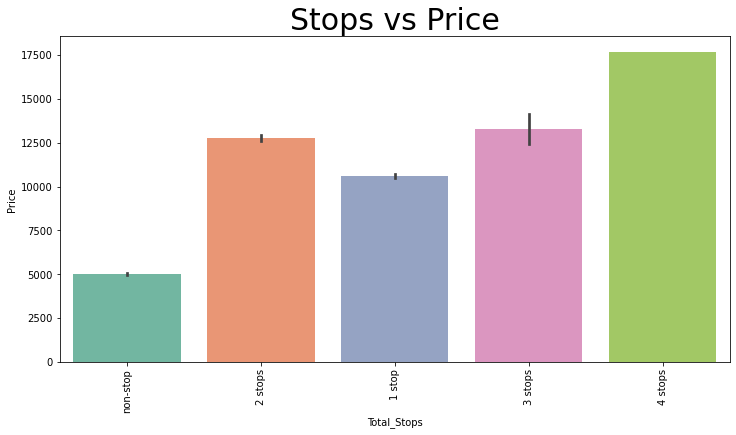

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(df['Total_Stops'], df['Price'], palette='Set2')
plt.title('Stops vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

For non-stop flights price is less, for 4 stops flight the price is very high.

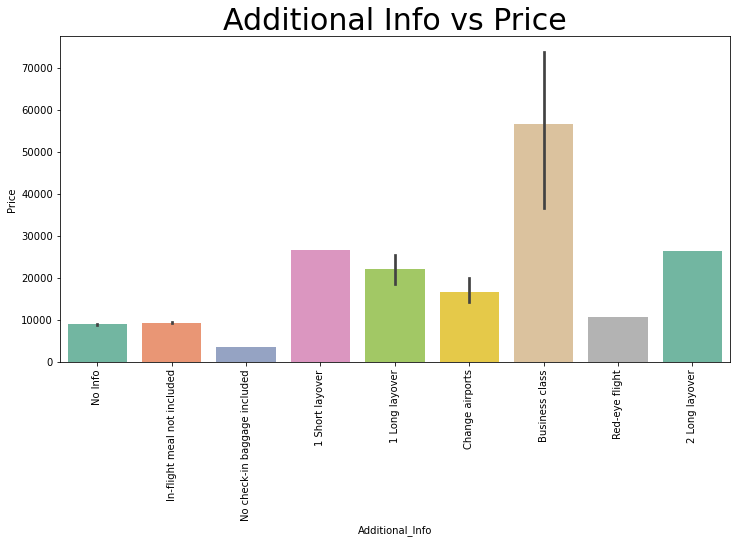

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(df['Additional_Info'], df['Price'], palette='Set2')
plt.title('Additional Info vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

Business Class having the highest prices.

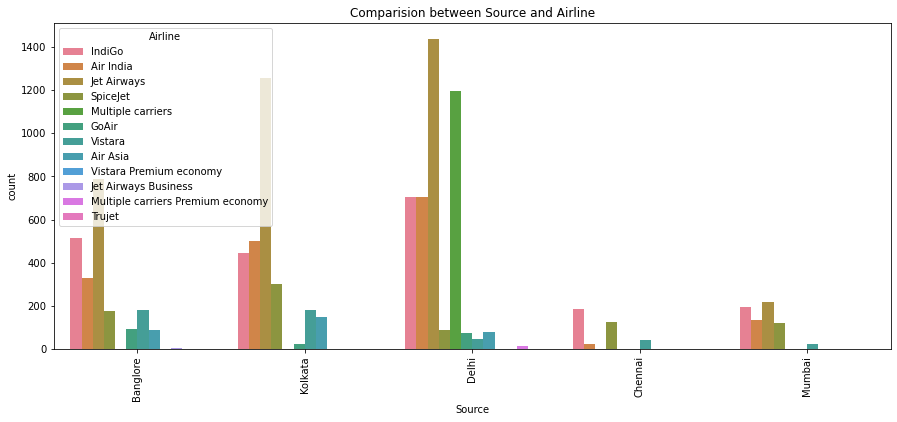

In [52]:
#Comparision between features using count plot
plt.figure(figsize=[15,6])
plt.title('Comparision between Source and Airline')
sns.countplot(x="Source",hue="Airline",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

In all sources Jet Airways is  quite famous except Chennai only.

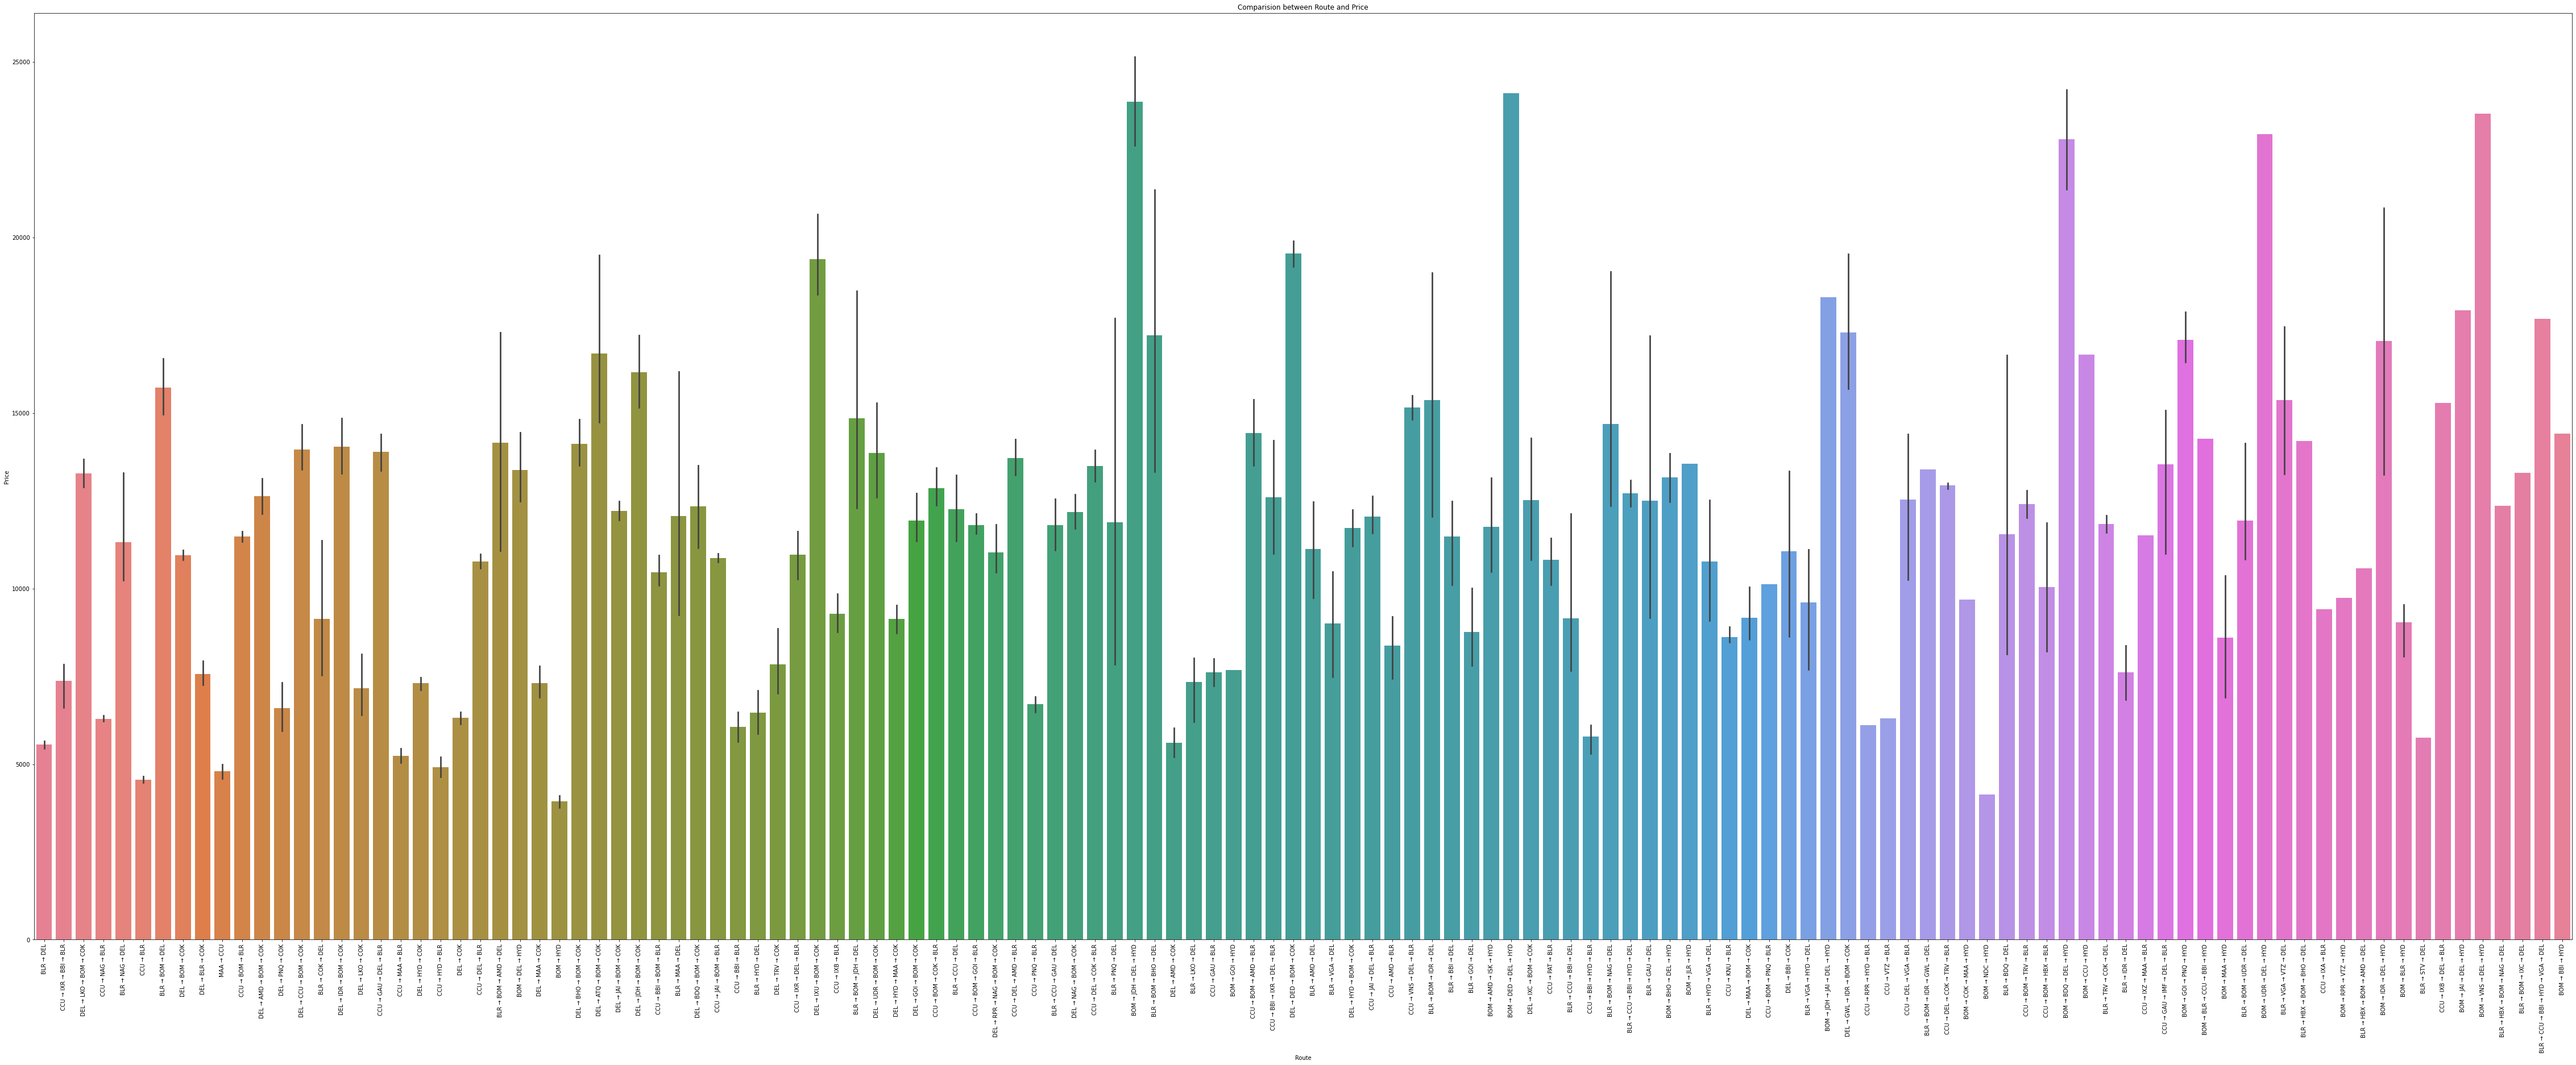

In [54]:
#Comparision between features using box plot
plt.figure(figsize=[80,30])
plt.title('Comparision between Route and Price')
sns.barplot(df['Route'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

BOM->JDH->DEL->HYD, BOM->DED->DEL->HYD and BOM->BOQ->DEL->HYD Routes has maximum price compared to other routes.

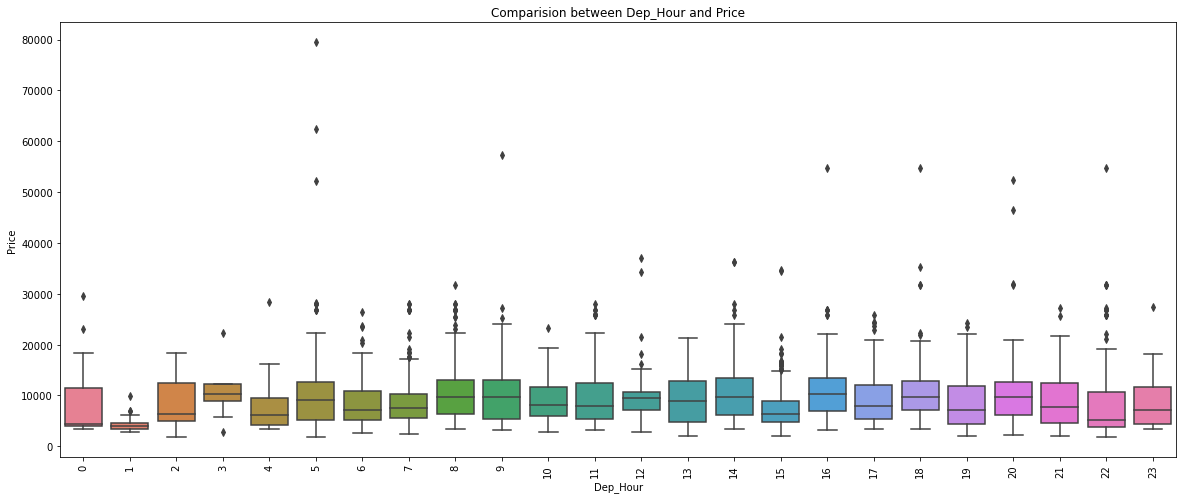

In [56]:
#Comparision between features using box plot
plt.figure(figsize=[20,8])
plt.title('Comparision between Dep_Hour and Price')
sns.boxplot(df['Dep_Hour'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

Dep_Hour has no proper relation with price.

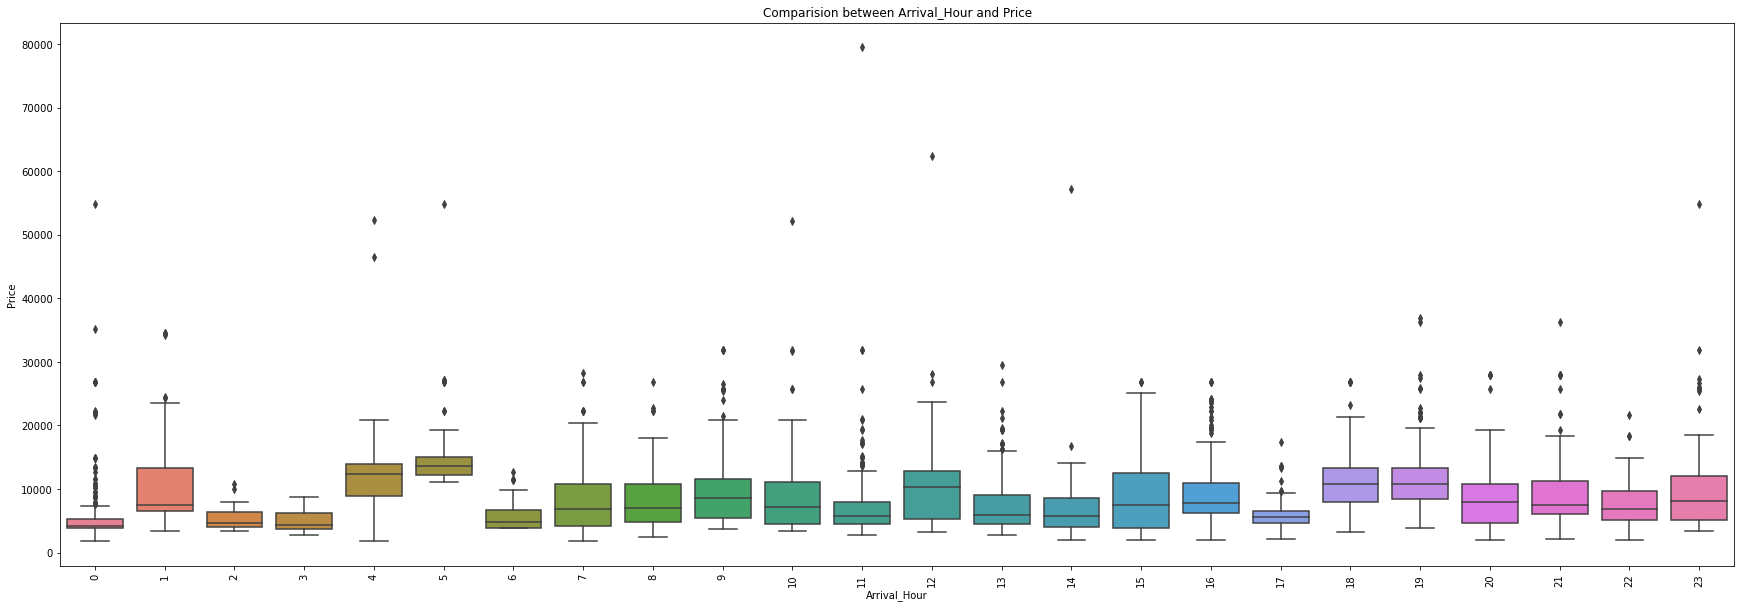

In [58]:
#Comparision between features using box plot
plt.figure(figsize=[30,10])
plt.title('Comparision between Arrival_Hour and Price')
sns.boxplot(df['Arrival_Hour'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

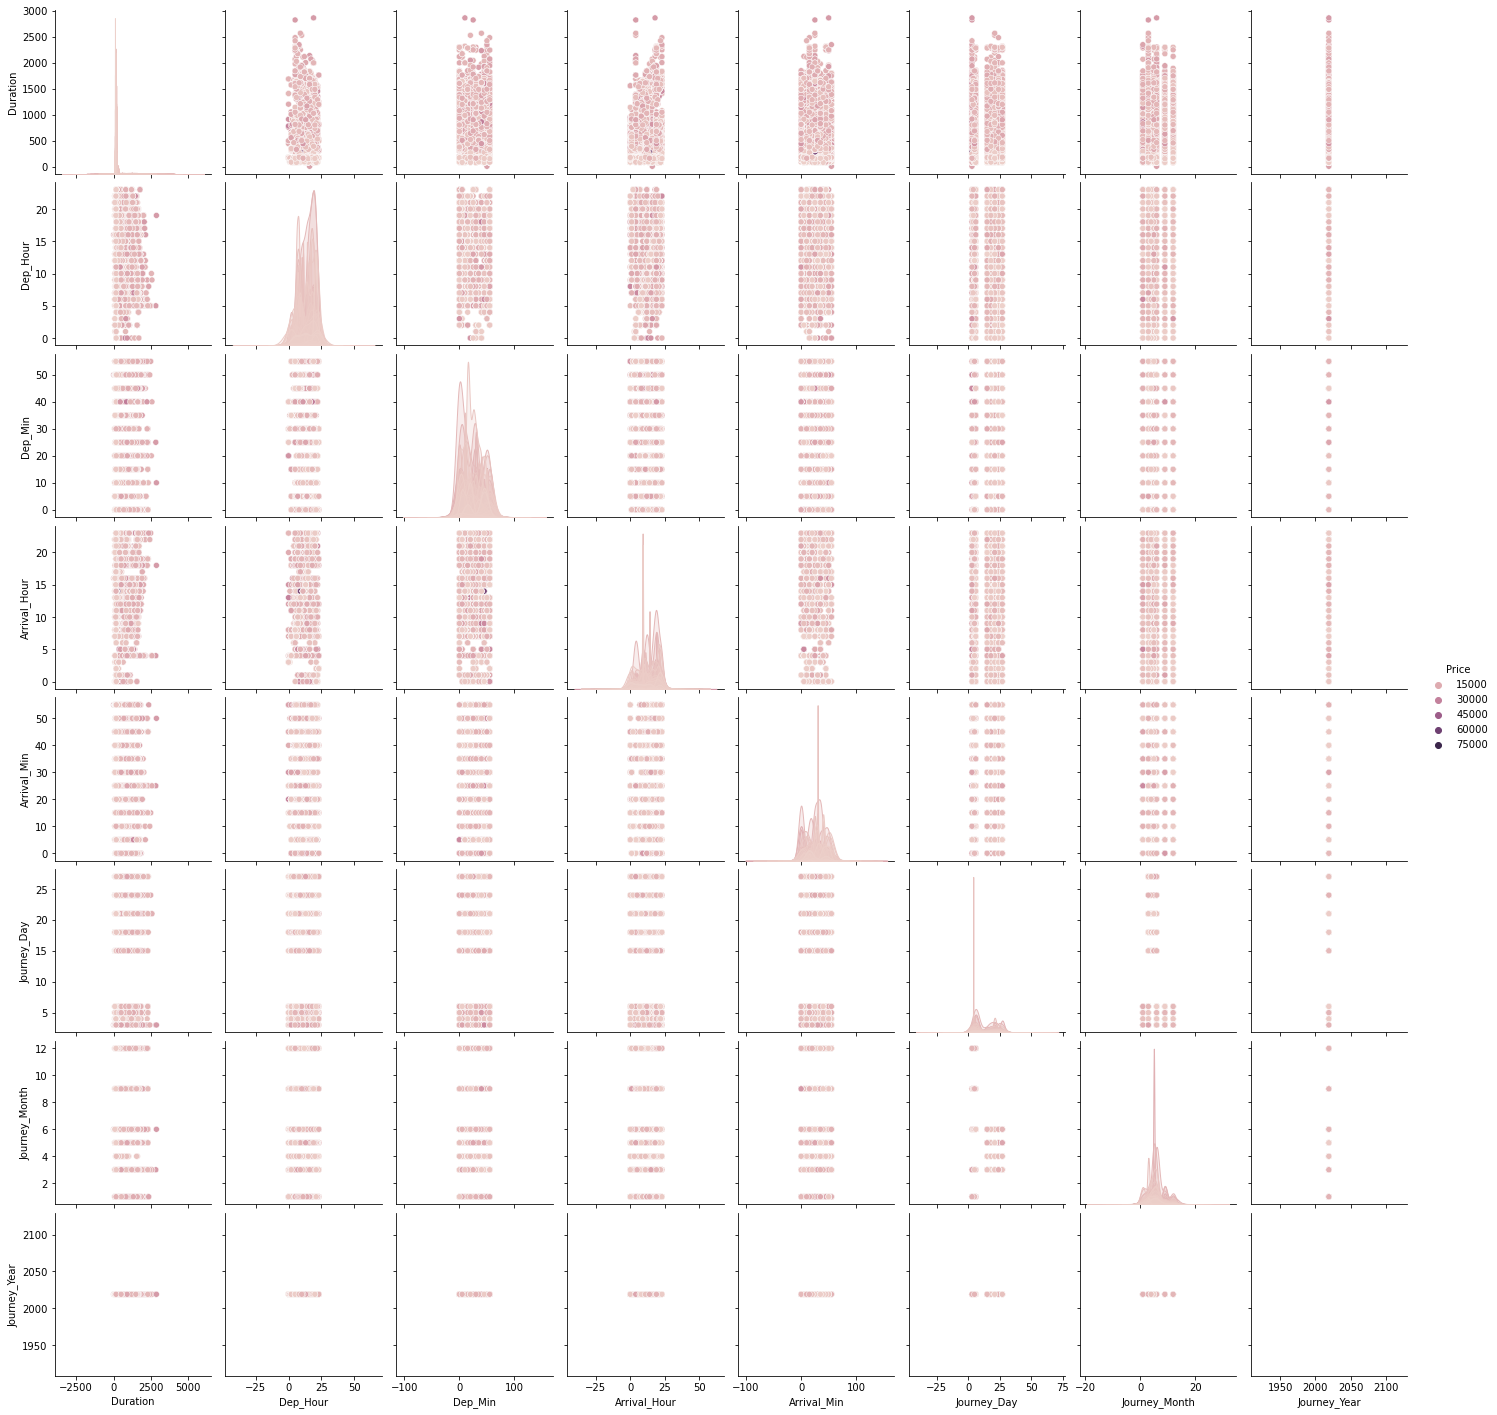

In [59]:
#pair ploting for df
sns.pairplot(df,hue="Price")

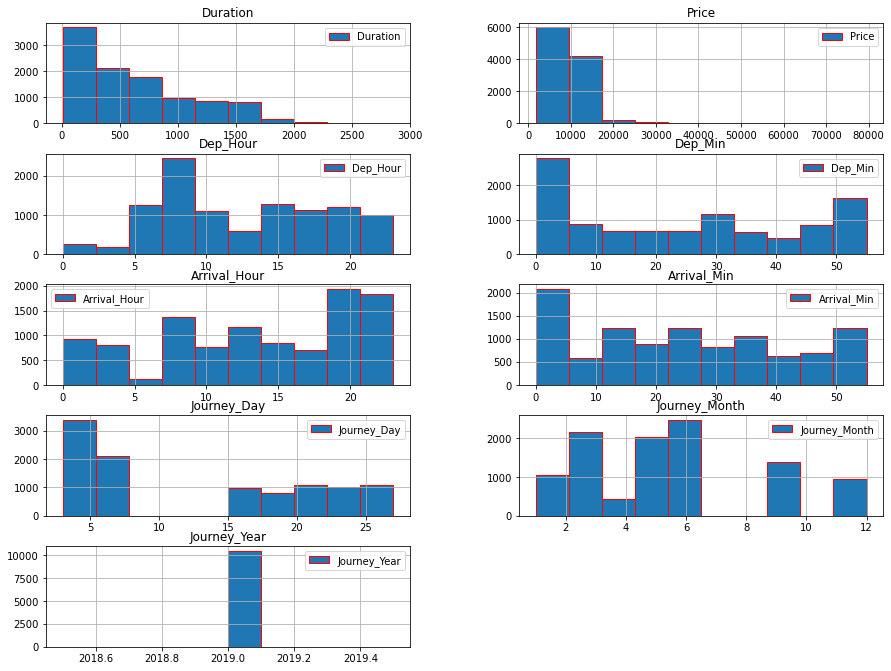

In [61]:
df.hist(figsize=(15,50),edgecolor='red',layout=(21,2),bins=0,legend=True)
plt.show()

## Feature Engineering & Selection

### 1. Outliers detection and Removal

- **As Features 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Journey_Day', 'Journey_Month' are  time-data-sequences in nature. So concept of outliers doesnot applicable to them.**
- **Concept of Outliers is only Valid for Continous Numerical data.**

In [25]:
Numerical_Features = ['Duration', 'Price']

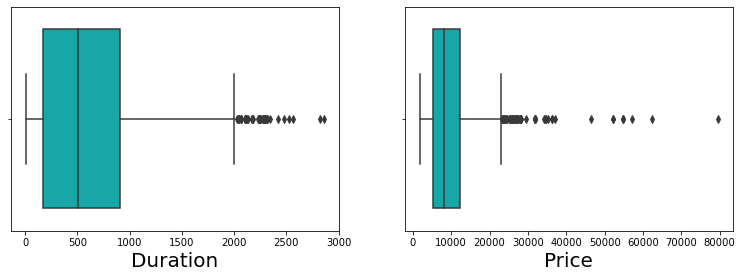

In [26]:
plt.figure(figsize=(20,14),facecolor='white')
plotnumber=1

for column in Numerical_Features:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [27]:
from scipy.stats import zscore
z = np.abs(zscore(df[Numerical_Features]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (10461, 15)
Shape of the dataframe after removing outliers:  (10305, 15)
Percentage of data loss post outlier removal:  1.4912532262689993


**We have data loss of 1.49%, which is acceptable.**

### 2. Skewness Detection and Transformation in Numerical Features

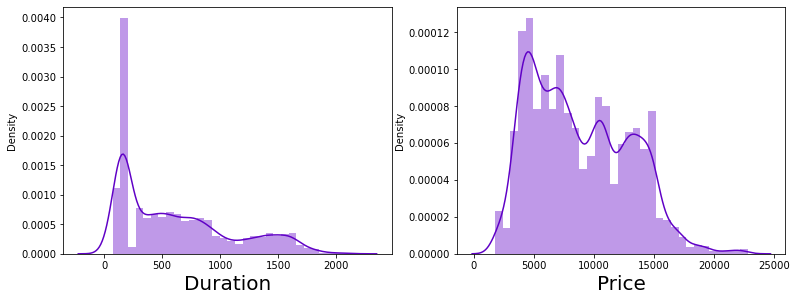

In [28]:
plt.figure(figsize=(20,10),facecolor='white')
sns.set_palette('gnuplot')
plotnum=1
for col in Numerical_Features:
    if plotnum<=6:
        plt.subplot(2,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [29]:
df[Numerical_Features].skew()

Duration    0.818604
Price       0.442586
dtype: float64

In [30]:
df['Duration'] = np.log1p(df['Duration'])

In [32]:
df[Numerical_Features].skew()

Duration   -0.150391
Price       0.442586
dtype: float64

### 3. Corrleation 

In [33]:
df.corr()

,Duration,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Journey_Day,Journey_Month
Duration,1.000000,0.672403,-0.004905,-0.038245,0.068437,-0.127095,-0.045945,0.078975
Price,0.672403,1.000000,0.010034,-0.054905,0.043359,-0.101595,-0.147768,0.069263
Dep_Hour,-0.004905,0.010034,1.000000,-0.017418,0.004651,0.073896,-0.009022,0.027817
Dep_Min,-0.038245,-0.054905,-0.017418,1.000000,0.048821,-0.021742,-0.010550,0.009342
Arrival_Hour,0.068437,0.043359,0.004651,0.048821,1.000000,-0.152207,-0.001911,-0.003113
Arrival_Min,-0.127095,-0.101595,0.073896,-0.021742,-0.152207,1.000000,-0.020052,-0.024150
Journey_Day,-0.045945,-0.147768,-0.009022,-0.010550,-0.001911,-0.020052,1.000000,-0.279664
Journey_Month,0.078975,0.069263,0.027817,0.009342,-0.003113,-0.024150,-0.279664,1.000000


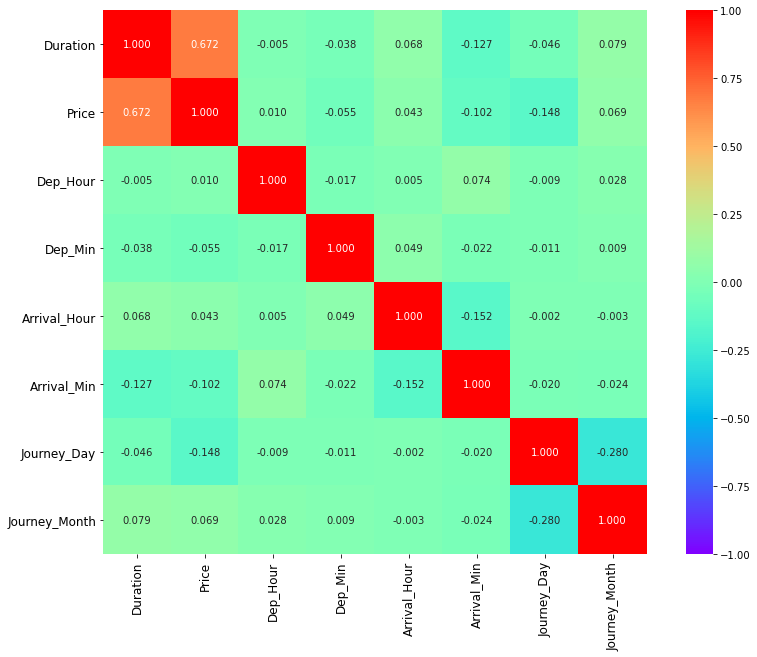

In [34]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap= 'rainbow')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation= 0)
plt.show()

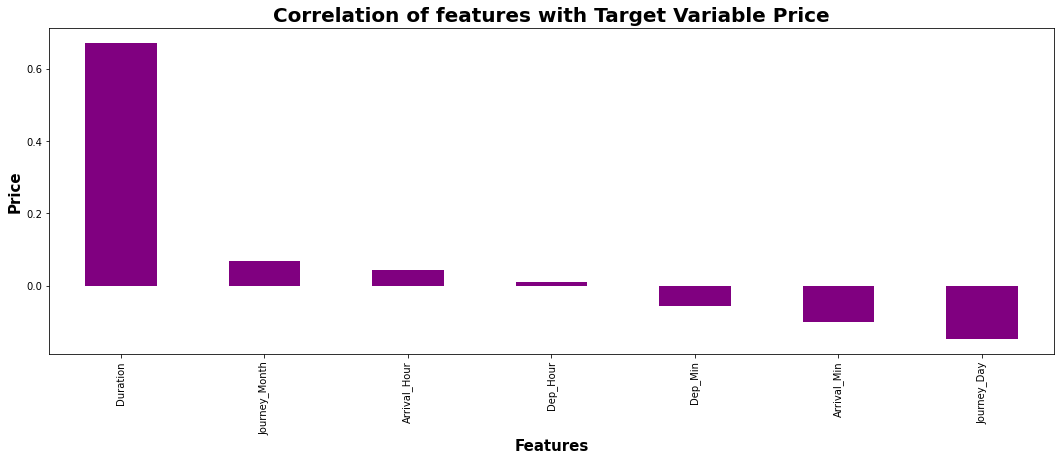

In [35]:
plt.figure(figsize = (18,6))
df.corr()['Price'].drop(['Price']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Price',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Price',fontsize = 20,fontweight='bold')
plt.show()

### 4. Encoding categorical data

In [38]:
Categorical_Features = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info', 'Week_Day']

In [39]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_Features:
    df[i] = le.fit_transform(df[i])
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Journey_Day,Journey_Month,Week_Day
0,3,0,2,18,170,4,3,3897,22,20,1,10,24,3,3
1,1,3,0,81,445,1,3,7662,5,50,13,15,5,1,2
2,4,2,1,115,1140,1,3,13882,9,25,4,25,6,9,0
3,3,3,0,88,325,0,3,6218,18,5,23,30,5,12,4
4,3,0,2,29,285,0,3,13302,16,50,21,35,3,1,4


### 5. Standard Scaling

In [41]:
# Splitting data in target and dependent feature
X = df.drop(['Price'], axis =1)
Y = df['Price']

In [44]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

 ### 5. Checking Multicollinearity between features using variance_inflation_factor

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.034072,Airline
1,1.428426,Source
2,1.691504,Destination
3,1.532537,Route
4,1.737057,Duration
5,2.391514,Total_Stops
6,1.121303,Additional_Info
7,1.033779,Dep_Hour
8,1.021015,Dep_Min
9,1.036344,Arrival_Hour


## Machine Learning Model Building

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=0.3)
print('Training Feature Matrix Size:', X_train.shape)
print('Training Target Vector Size :', Y_train.shape)
print('Test Feature Matrix Size:', X_test.shape)
print('Test Target Vector Size:', Y_test.shape)

Training Feature Matrix Size: (7213, 14)
Training Target Vector Size : (7213,)
Test Feature Matrix Size: (3092, 14)
Test Target Vector Size: (3092,)


### **Finding best Random state**

In [55]:
maxR2_score=0
maxRS=0
for i in range(50,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.496033105453895 on Random_state 492


### **Linear Regression**

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 492, test_size=0.25)
lin_reg= LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 2242.4408662024616
Mean squared error : 8037441.4106131075
Root Mean squared error : 2835.0381673997103
 R2 Score :
49.6033105453895


In [57]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.4673306242961763
Difference in R2 & CV Score: 2.870248115771872


### **Random Forest Regressor**

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 492, test_size=0.25)
rfc = RandomForestRegressor()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
print('\033[1m'+ 'Error of Random Forest Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Random Forest Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Random Forest Regressor:
Mean absolute error : 609.455370545916
Mean squared error : 1223370.9444065923
Root Mean squared error : 1106.0610039263622
R2 Score of Random Forest Regressor :
92.32917013968634


In [60]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',rfc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.9201590679371154
Difference in R2 & CV Score: 0.31326334597480354


### **Decision Tree Regressor**

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 492, test_size=0.25)
dtc = DecisionTreeRegressor()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Decision Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Decision Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Decision Tree Regressor:
Mean absolute error : 680.0966239813737
Mean squared error : 2046445.5748932867
Root Mean squared error : 1430.540308727191
R2 Score of Decision Tree Regressor :
87.16829437941848


In [63]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',dtc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.8670355378683178
Difference in R2 & CV Score: 0.46474059258670763


### **Extra Trees Regressor**

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 492, test_size=0.25)
etc = ExtraTreesRegressor()
etc.fit(X_train, Y_train)
y_pred = etc.predict(X_test)
print('\033[1m'+ 'Error of Extra Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Extra Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Extra Tree Regressor:
Mean absolute error : 582.2596520501876
Mean squared error : 1202625.1727171799
Root Mean squared error : 1096.642682334214
R2 Score of Extra Tree Regressor :
92.45925111445364


In [65]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(etc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',etc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.9228437563494045
Difference in R2 & CV Score: 0.17487547951319016


### **XGB Regressor**

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 492, test_size=0.25)
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)
print('\033[1m'+ 'Error of XGB Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of XGB Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of XGB Regressor:
Mean absolute error : 665.2028591169328
Mean squared error : 1089641.6267742172
Root Mean squared error : 1043.8590071337303
R2 Score of XGB Regressor :
93.16768510326622


In [67]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',xgb,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) :

Mean CV Score : 0.9291812226922916
Difference in R2 & CV Score: 0.24956283403706436


**XGB regressor gives maximum R2 Score of 0.9316 with Mean cross validation score 0.9291. So we will perform hyperparameter tuning on this model.**

## **Hyper Parameter Tuning : GridSearchCV**

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
print(xgb.get_params())

{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 4, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [71]:
parameter = {'n_estimators':[50,100,125],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'learning_rate' : [0.01, 0.1,0.3,0.5,1] }

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 492, test_size=0.25)

In [73]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)

In [74]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5; 1/360] START booster=gbtree, gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=50
[CV 1/5; 1/360] END booster=gbtree, gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=50;, score=-1.231 total time=   0.3s
[CV 2/5; 1/360] START booster=gbtree, gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=50
[CV 2/5; 1/360] END booster=gbtree, gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=50;, score=-1.331 total time=   0.3s
[CV 3/5; 1/360] START booster=gbtree, gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=50
[CV 3/5; 1/360] END booster=gbtree, gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=50;, score=-1.242 total time=   0.2s
[CV 4/5; 1/360] START booster=gbtree, gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=50
[CV 4/5; 1/360] END booster=gbtree, gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=50;, score=-1.344 total time=   0.3s
[CV 5/5; 1/360] START bo

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_esti...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=N

In [75]:
GCV.best_params_

{'booster': 'gbtree',
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 125}

## Final Regression Model

In [78]:
Final_mod =  XGBRegressor(n_estimators=125 , booster= 'gbtree', learning_rate= 0.1, max_depth= 8, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 633.6503443927047
Mean squared error : 1033499.1686449125
Root Mean Squared Error: 1016.6116115040751


 R2 Score of Final Model :
0.9351971180965378




## Final Regression For Train Dataset Saving Model

In [80]:
import joblib
joblib.dump(Final_mod,'Flight_Price_Predication_Final.pkl')

['Flight_Price_Predication_Final.pkl']

In [81]:
# Loading the saved model
Model = joblib.load("Flight_Price_Predication_Final.pkl")

# prediction on X_Test Data
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

,Actual Values,Predicted Values
0,10676,9705.400391
1,5780,4905.257324
2,10262,10426.554688
3,5176,6054.783203
4,5678,5671.997559
...,...,...
2572,5769,5765.060059
2573,17261,16910.095703
2574,9495,7774.281250
2575,13587,10595.169922


# ML Model for Test Dataset

In [82]:
test_df = pd.read_excel("Test_set.xlsx")

In [83]:
test_df.shape

(2671, 10)

**Feature Extraction for Test Dataset**

In [84]:
# Converting Date and Time columns from object type to Date type
test_df['Date_of_Journey']=pd.to_datetime(test_df['Date_of_Journey'])
test_df['Dep_Time']=pd.to_datetime(test_df['Dep_Time'])
test_df['Arrival_Time']=pd.to_datetime(test_df['Arrival_Time'])

- **Feature Engineering on 'Arrival_Time' Column**

In [85]:
# Extracting Arrival_Hour from Arrival_Time column
test_df['Arrival_Hour']=pd.to_datetime(test_df['Arrival_Time']).dt.hour

# Extracting Arrival_Min from Arrival_Time column
test_df['Arrival_Min']=pd.to_datetime(test_df['Arrival_Time']).dt.minute

# Dropping Arruval_Time column
test_df.drop("Arrival_Time",axis=1,inplace=True)

- **Feature Engineering on 'Dep_Time' Column**

In [86]:
# Extracting Hours from Dep_Time column
test_df['Dep_Hour']=pd.to_datetime(test_df['Dep_Time']).dt.hour

# Extracting Minutes from Dep_Time column
test_df['Dep_Min']=pd.to_datetime(test_df['Dep_Time']).dt.minute

# Dropping Dep_Time column
test_df.drop("Dep_Time",axis=1,inplace=True)

- **Feature Engineering on 'Duration' Column**

In [87]:
test_df['Duration']=test_df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
# convert this column into a numeric
test_df['Duration']=pd.to_numeric(test_df['Duration'])

- **Feature Engineering on Date of Journey Columns**

In [88]:
# Extracting Day from Date_of_journey column
test_df['Journey_Day'] = pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_journey column
test_df['Journey_Month'] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.month


- **Extracting Week Day**

In [90]:
# Extracting WeekDay from Date_of_journey column
test_df['Week_Day'] = pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.day_name()

# Dropping Date_of_journey column
test_df.drop("Date_of_Journey",axis=1,inplace=True)

- **Data correction in categorical features**

In [91]:
# Replacing "New Delhi" as "Delhi" in Destination column
test_df["Destination"] = test_df["Destination"].replace("New Delhi","Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
test_df["Additional_Info"] = test_df["Additional_Info"].replace("No info","No Info")

**Checking Duplicate entry**

In [92]:
test_df.duplicated().sum() # This will check the duplicate data for all columns.

26

In [93]:
test_df.drop_duplicates(keep='last',inplace= True)

- **Missing Value Check**

In [94]:
#Finding what percentage of data is missing from the dataset
missing_values = test_df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(test_df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                 Missing Values  % Missing data
Week_Day                      0             0.0
Journey_Month                 0             0.0
Journey_Day                   0             0.0
Dep_Min                       0             0.0
Dep_Hour                      0             0.0
Arrival_Min                   0             0.0
Arrival_Hour                  0             0.0
Additional_Info               0             0.0
Total_Stops                   0             0.0
Duration                      0             0.0
Route                         0             0.0
Destination                   0             0.0
Source                        0             0.0
Airline                       0             0.0


### Outliers detection and removal

In [98]:
Numerical_Features = ['Duration']

In [99]:
from scipy.stats import zscore
z = np.abs(zscore(test_df[Numerical_Features]))
threshold = 3
test_df1 = test_df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", test_df.shape)
print ("Shape of the dataframe after removing outliers: ", test_df1.shape)
print ("Percentage of data loss post outlier removal: ", (test_df.shape[0]-test_df1.shape[0])/test_df.shape[0]*100)

test_df = test_df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (2645, 14)
Shape of the dataframe after removing outliers:  (2627, 14)
Percentage of data loss post outlier removal:  0.6805293005671078


In [100]:
test_df[Numerical_Features].skew()

Duration    0.825825
dtype: float64

In [101]:
test_df['Duration'] = np.log1p(test_df['Duration'])

In [102]:
test_df[Numerical_Features].skew()

Duration   -0.219876
dtype: float64

- **Label Encoding**

In [103]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_Features:
    test_df[i] = le.fit_transform(test_df[i])
test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Journey_Day,Journey_Month,Week_Day
0,4,2,1,76,6.486161,0,4,4,25,17,30,6,6,4
1,3,3,0,65,5.484797,0,4,10,20,6,20,5,12,4
2,4,2,1,76,7.262629,0,3,19,0,19,15,21,5,5
3,6,2,1,76,6.660575,0,4,21,0,8,0,21,5,5
4,0,0,2,16,5.141664,4,4,2,45,23,55,24,6,1


- **Standard Scaling**

In [104]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
test_df_scale = scaler.fit_transform(test_df)

## Prediction on Test Dataset Using Final Model

In [105]:
# Loading the saved model
Model = joblib.load("Flight_Price_Predication_Final.pkl")

In [106]:
# Predicting the flight price from the features of the testing data
Predicted_Price_test = Model.predict(test_df_scale)
Predicted_Price_test

# Creating dataframe for Test data prediction
Prediction = pd.DataFrame()
Prediction['Price'] = Predicted_Price_test
Prediction

,Price
0,14340.430664
1,5921.596680
2,11864.562500
3,8878.133789
4,3207.474609
...,...
2622,9552.082031
2623,3376.217529
2624,16065.660156
2625,13489.647461


**Writing CSV file of Prediction**

In [107]:
# Saving the Predictions
Prediction.to_csv("Submission_Flight_Price_Test_Data.csv",index=False)

## Let's Summaries Our Project report:

- Here firstly we have imported necessary liabraries which we required us for dataset reading, data wrangling, data interpretention.
- after that we loaded dataset using pandas liabary, and tried to explore dataset by doing integrity check, statastical anaylsis.
- Here we tried to explore dataset using count plot,pie plot, voilin plot, scatter plot, histplot,from this we get idea how price and other feature are co related to eachother and also get insights of which feature are affecting the prices.
- after wards we try to clean data by checking and removing the outliers, skewness and afterwards we scale the data using standard scaler method.
- As we all know our target feature is **'Price'**, as it having continous values, so here we get clear idea that we need to build machine learning model using regession Algorithm.
- So, we build the Machine Learning Algorithm for the same, afterwards we have done hyper paratunning on our best model which have the R2 score of 93%  and Mean cv score of 92% and save the final model using the parameter of hyper paratunning.
-  Save final model in csv format as we need to predict the prices and in further steps we need to run the our prediction using the test data set.
- here for test data we have followed same steps which we have done for train dataset.
- predicted the flight prices on test dataset.